#Mall Customers Segmentation



*   Hierarchical algorithms : recursively split a dataset into a smaller subset until a subset contains only one item.
*   Partitional algorithms : divide a dataset into several subsets(cluseters) based on a given criteria. For some algorithms number of clusters has to be defined a priori(e.g K-Means) and for some not (DBSCAN).



##2. Reading data

In [1]:
#importing basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.3.5
numpy version: 1.21.5
seaborn version: 0.11.2


In [2]:
mall_data = pd.read_csv('/content/drive/MyDrive/ESAA(22-1)/Week6/Mall_Customers.csv')

In [3]:
# number of rows
mall_data.shape[0]

200

In [4]:
#number of columns
mall_data.shape[1]

5

In [5]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 5 columns:

*   Customer ID - numerical - unique customer number, integer
*   Gender - categorical - binary (Male/Female)
*   Age - numerical - integer
*   Annual Income (k$) - numerical - integer
*   Spending Score (1-100) - numerical - integer









In [7]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing data. This simplifies the analysis but it is a very unlikely scenario in a real-life where analysts spend a significant amount of time cleaning their data before the core analysis is performed.

##3. Exploratory Data Analysis

This section contains a basic statistical investigation of a given database. It is a crucial point in any analysis as it allows for a better understanding of the underlying data. This part has two main sections: distributions and correlations.

###3.1 Distributions

In this chapter distributions of numerical variables will be investigated in detail. Data will be stratified by gender - the only categorical variable.

In [14]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] #subset with males age
females_age = mall_data[mall_data['Gender']=='Female']['Age'] #subset with females age
age_bins = range(15,75,5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


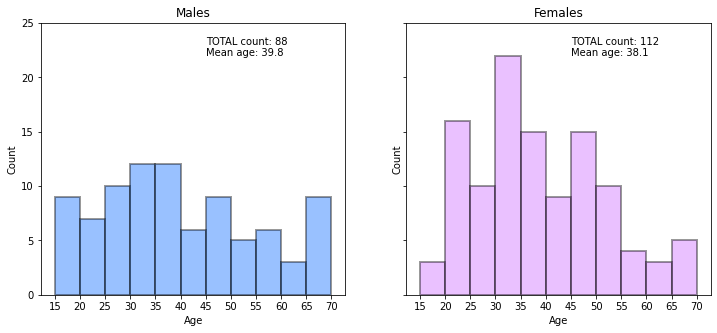

In [15]:
#males histogrm
fig2,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(males_age, bins = age_bins, kde=False, color = '#0066ff',ax=ax1, 
             hist_kws =dict(edgecolor='k',linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23,"TOTAL count: {}".format(males_age.count()))
ax1.text(45,22,"Mean age: {:.1f}".format(males_age.mean()))

#females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [16]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


The average age of male customers is lightly higher than female ones (39.8 versus 38.1). Distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years old. Kolgomorov-Smirnov test shows that the differences between these two groups are statistically insignificant.

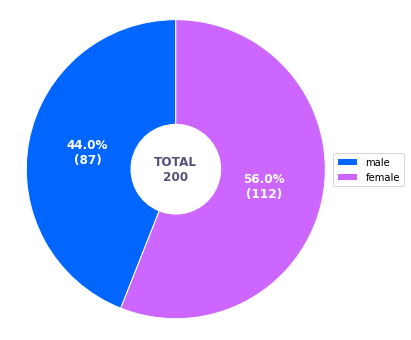

In [19]:
def labeler(pct,allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct,absolute)
sizes = [males_age.count(),females_age.count()]   #wedge sizes

fig0,ax1 = plt.subplots(figsize=(6,6))
wedges, texts,autotexts = ax1.pie(sizes, autopct = lambda pct: labeler(pct,sizes),
                                  radius=1,colors=['#0066ff','#cc66ff'],
                                  startangle=90, textprops=dict(color='w'),
                                  wedgeprops=dict(width=0.7,edgecolor='w'))
ax1.legend(wedges,['male','female'],loc='center right',bbox_to_anchor=(0.7,0,0.5,1))

plt.text(0,0,'TOTAL\n{}'.format(mall_data['Age'].count()), weight='bold',
         size=12, color='#52527a',ha = 'center',va='center')

plt.setp(autotexts, size =12, weight='bold')
ax1.axis('equal')   #Equal aspect ratio
plt.show()

There are slightly more female customers than male ones (112 vs. 87). Females are 56% of total customers.

In [20]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income
my_bins = range(10,150,10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


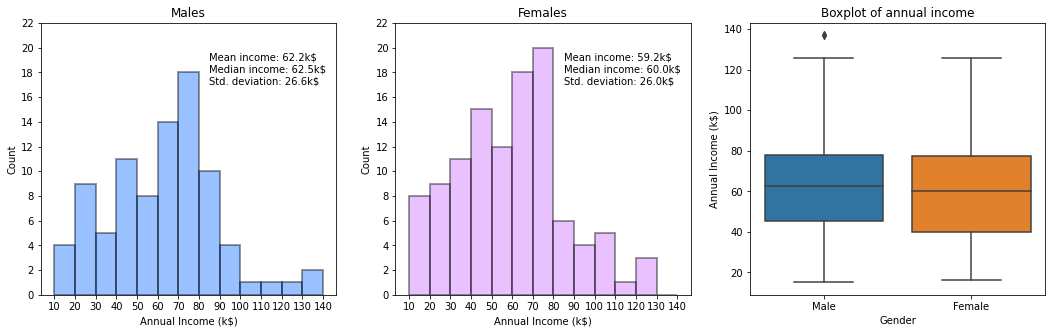

In [21]:
# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [22]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


Mean income of males is higher than females (62.2 k$ vs. 59.2k\$). Also median income of male customers (62.5k$) is higher thn female ones (60k\$). Standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$. K-S test shows that these two groups are not statistically different.

In [23]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age
spending_bins = range(0,105,5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


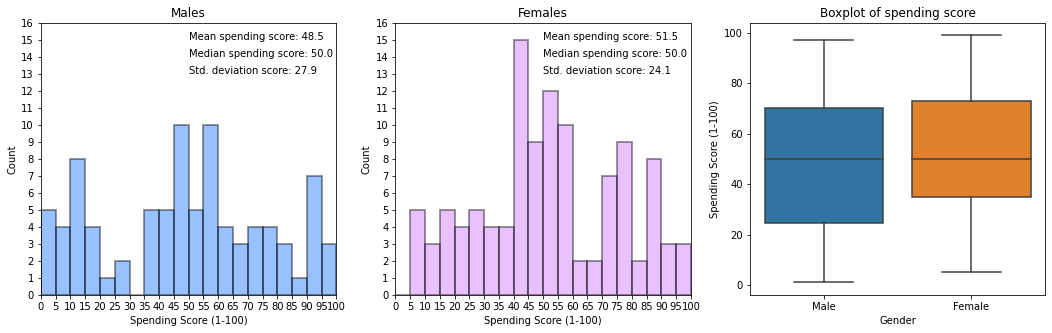

In [24]:
# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [25]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


A mean spending score for women (51.5) is higher than men (48.5). The K-S test p-value indicates that there is no evidence to reject the null-hypothesis, however the evidence is not so strong as in previous comparisons. Next I will calculate median income for all age groups.

In [27]:
medians_by_age_group = mall_data.groupby(['Gender',pd.cut(mall_data['Age'],age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender','Age_group'])

pd.cut() : 수치형 변수를 특정 구간으로 나눈 범주형 레이블을 생성할 수 있다. 위 함수들을 이용하여 특정 구간들에 대한 그룹별 통계량을 구하는 것이 가능해진다.

In [28]:
medians_by_age_group

CustomerID   Age  Annual Income (k$)  Spending Score (1-100)
Gender Age_group                                                              
Female (15, 20]        112.0  19.0                63.0                    50.0
       (20, 25]         46.0  23.0                39.0                    65.0
       (25, 30]        139.5  29.0                74.5                    73.0
       (30, 35]        126.0  32.0                70.0                    69.0
       (35, 40]        138.5  38.0                73.5                    41.0
       (40, 45]        137.0  44.0                73.0                    28.0
       (45, 50]         82.0  49.0                54.0                    44.5
       (50, 55]         87.0  54.0                57.0                    43.0
       (55, 60]         74.0  58.0                50.0                    35.0
       (60, 65]         79.0  64.0                51.5                    39.0
       (65, 70]         79.5  67.5                53.5                    51.0
Male   (15, 20]         80.5  19.0                53.5                    47.5
       (20, 25]         32.0  24.0                31.0                    76.0
       (25, 30]        159.0  28.0                82.0                    72.0
       (30, 35]        150.0  33.0                78.0                    63.0
       (35, 40]        131.0  38.5                71.0                    65.0
       (40, 45]        151.0  43.0                78.0                    20.0
       (45, 50]        102.0  48.0                61.5                    38.5
       (50, 55]         46.5  53.0                39.5                    37.5
       (55, 60]         81.0  59.0                54.0                    15.0
       (60, 65]         65.0  64.0                48.0                    51.0
       (65, 70]         77.0  67.5                51.5                    47.0

In [29]:
medians_by_age_group.index

MultiIndex([('Female', (15, 20]),
            ('Female', (20, 25]),
            ('Female', (25, 30]),
            ('Female', (30, 35]),
            ('Female', (35, 40]),
            ('Female', (40, 45]),
            ('Female', (45, 50]),
            ('Female', (50, 55]),
            ('Female', (55, 60]),
            ('Female', (60, 65]),
            ('Female', (65, 70]),
            (  'Male', (15, 20]),
            (  'Male', (20, 25]),
            (  'Male', (25, 30]),
            (  'Male', (30, 35]),
            (  'Male', (35, 40]),
            (  'Male', (40, 45]),
            (  'Male', (45, 50]),
            (  'Male', (50, 55]),
            (  'Male', (55, 60]),
            (  'Male', (60, 65]),
            (  'Male', (65, 70])],
           names=['Gender', 'Age_group'])

In [30]:
medians_by_age_group.reset_index(inplace=True)

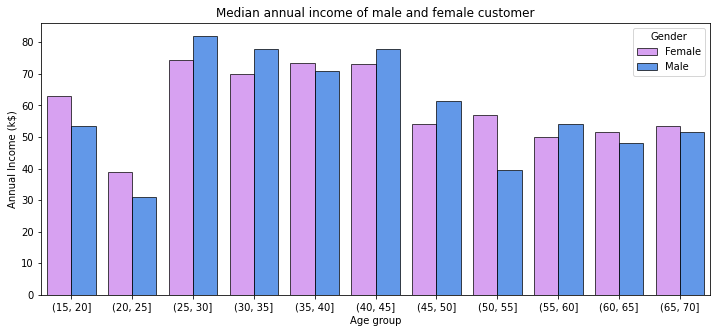

In [31]:
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group',y='Annual Income (k$)',hue='Gender',
            data=medians_by_age_group,palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k', ax=ax)
ax.set_title('Median annual income of male and female customer')
ax.set_xlabel('Age group')
plt.show()

A bar chart above shows that the most wealthy customers are in age of 25-45 years old. The biggest difference between women and men is visible in age groups 25-30 (male more rich) and 50-55 (female more rich).

###3.2 Correlations

This chapter investigates correlations between numerical variables.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


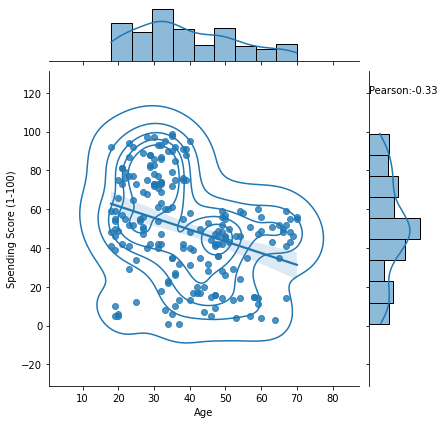

In [33]:
from scipy.stats import pearsonr

#calculating Pearson's correlation
corr,_ = pearsonr(mall_data['Age'],mall_data['Spending Score (1-100)'])
jp = (sns.jointplot('Age','Spending Score (1-100)',data=mall_data,kind='reg')).plot_joint(sns.kdeplot,zorder=0,n_levels=6)
plt.text(0,120,'Pearson:{:.2f}'.format(corr))
plt.show()

In [34]:
males_age

0      19
1      21
8      64
10     67
14     37
       ..
187    28
192    33
197    32
198    32
199    30
Name: Age, Length: 88, dtype: int64

**age 와 income 사이의 correlation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


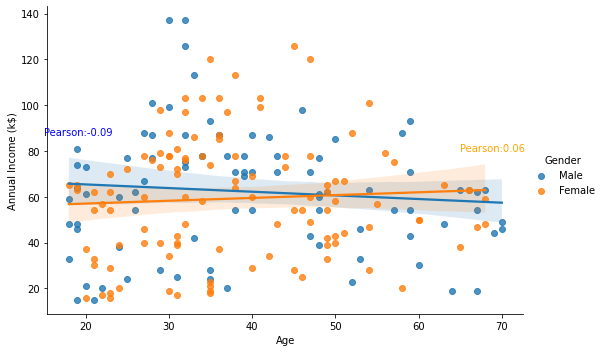

In [35]:
#calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age','Annual Income (k$)',data=mall_data, hue='Gender',aspect=1.5)
plt.text(15,87,'Pearson:{:.2f}'.format(corr1),color='blue')
plt.text(65,80,'Pearson:{:.2f}'.format(corr2),color='orange')

plt.show()

There is a negligible correlation between age and annual income of customers for both sex groups.

**age와 spending score 사이의 correlation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


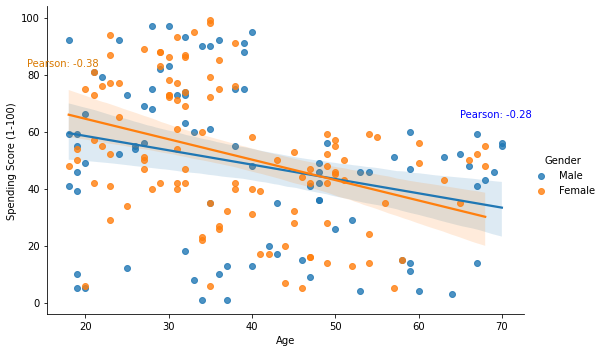

In [36]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age', 'Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

There are week negative correlations (<0.5) between age and spending score for both sex groups.

**income과 spending score 사이의 correlation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


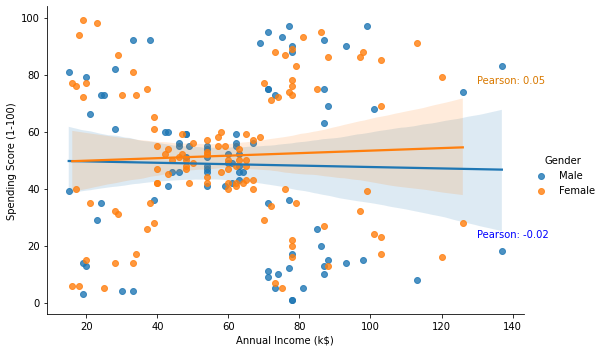

In [37]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

There is a negligible correlation between annual income and spending score of customers for both sex groups.

##4. Clustering

This section of the notebook describes and demonstrates how to use three clustering algorithms:  

*   K-Means
*   Density-Based Spatial Clustering of Applications with Noise(DBSCAN)
*   Affinity Propagation





###4.1 K-Means

This chapter focuses on a very popular K-Means algorithm being taught in most machine learning courses. The chapter contains two sub-chapters: description of the algorithm and a use case (mall customers segmentation).

####4.1.1 Description

The most well-known partitional clustering algorithm is K-Means. It was independently developed in many places in the 50s and 60s and gained great popularity because of its ease of implementation, simplicity and many empirical successes (e.g. in business, medicine and science).  
There are 3 main steps in K-Means algorithm (known also as Lloyd’s algorithm):  


1.   Split samples into initial groups by using seed points. The nearest samples to these seed point will create initial clusters.
2.   Calculate samples distances to groups’ central points (centroids) and assign the nearest samples to their cluster.
3. The third step is to calculate newly created (updated) cluster centroids.

Then repeat steps 2 and 3 until the algorithm converges.  




####4.1.2 Use case-customers segmentation

In [39]:
from sklearn.cluster import KMeans

For clustering only numeric columns are used.

In [40]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

In order to find an appropriate number of clusters, **the elbow method** will be used. In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. The rule is to choose the number of clusters where you see a kink or "an elbow" in the graph.

In [42]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] #number of clusters
clusters_inertia = [] #inertia of clusters
s_scores = [] #silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n,init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_) #data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) #data for the silhouette score method

The graph below shows the inertia for selected range of clusters.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


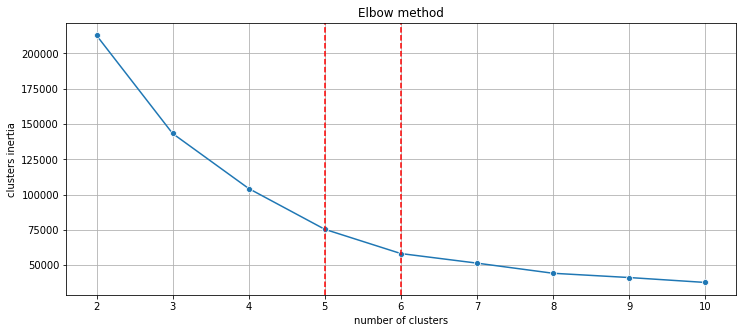

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

There is no clear "elbow" visible. A choice of 5 or 6 clusters seems to be fair. Let's see the silhouette score.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


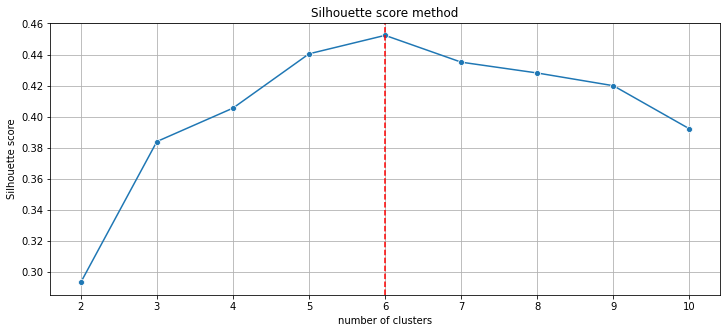

In [44]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()


Silhouette score method indicates the best options would be respectively 6 or 5 clusters. Let's compare both.

**5 CLUSTERS**

In [45]:
KM_5_clusters = KMeans(n_clusters=5, init = 'k-means++').fit(X_numerics) #initialise and fit K-Means model
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ #append labels to points

labels_ : 각 데이터 포인트가 속한 군집 

*   labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블 
*   cluster_centers_ : 각 군집 중심점 좌표.

이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있습니다.

*   n_iter_ : 수행된 이동 횟수



In [49]:
KM_5_clusters.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [47]:
KM5_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,0
197,32,126,74,3
198,32,137,18,0


In [50]:
KM_5_clusters.cluster_centers_  #총 다섯개의 center

array([[40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


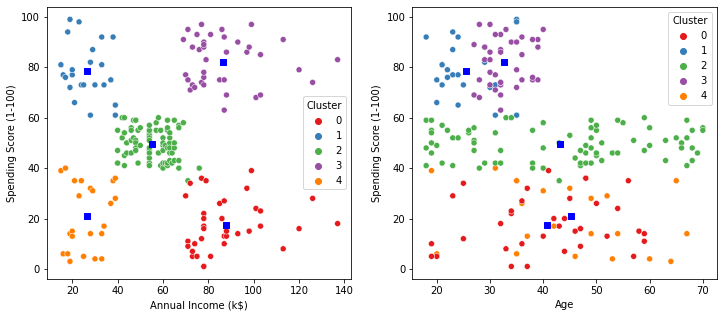

In [51]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means algorithm generated the following 5 clusters:  


*   clients with low annual income and high spending score
*   clients with medium annual income and medium spending score
*   clients with high annual income and low spending score
*   clients with high annual income and high spending score
*   clients with low annual income and low spending score







There are no distinct groups is terms of custers age.

**Sizes of the clusters:**

In [52]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,36
1,23
2,79
3,39
4,23


The biggest cluster is a cluster number 2 with 79 observations("medium-medium" clients). There are two the smallest ones each containing 23 observations(cluster 1 "low-high" and cluster 4 "low-low" clients). Below there is a 3D projection of 5 generated clusters. It is not very helpful in terms of a visualisation ina static mode but if you ruwn the code in an interactive environment(e.g.Spyder) you can rotate it!

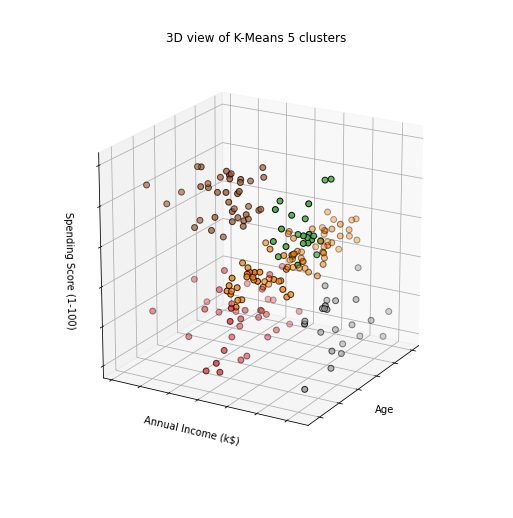

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

Below a Plotly version:


In [54]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

**6 CLUSTERS**

In [55]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



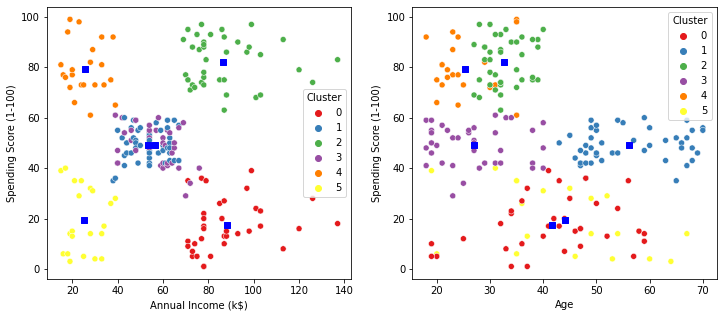

In [56]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means algorithm generated the following 6 clusters:
0. younger clients with **medium** annual and **medium** spending score  
1. clients with **high** annual income and **low** spending score  
2. younger clients with **medium** annual and **medium** spending score  
3. clients with **high** annual income and **high** spending score  
4. clients with **low** annual income and **low** spending score  
5. clients with **low** annual income and **high** spending score  

In [57]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,35
1,45
2,39
3,38
4,22
5,21


In [58]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

###4.2 DBSCAN

This chapter describes how DBSCAN (Density-Based Spatial Clustering of Applications with Noise) works and shows its implementation to the mall customers segmentation.

####4.2.1 Description

As the name of paper suggests the core idea of DBSCAN is around concept of dense regions. The assumption is that natural clusters are composed of densely located points. This requires definition of “dense region”. To do these two parameters are required for DBSCAN algorithm.



*   Eps, ε - distance
*   MinPts – Minimum number of points within distance Eps



Optionally the distance metric can be specified by a user, but usually Euclidean distance is implemented (like in scikit learn).

A “dense region” is therefore created by a minimum number of points within distance between all of them, Eps. Points which are within this distance but not close to minimum number of other points are treated as “border points”. Remaining ones are noise or outliers. This is shown in the picture below (for MinPts=3). Red points (D) are in a “dense region” – each one has minimum of 3 neighbours within distance Eps. Green points (B) are border ones – they have a neighbour within distance Eps but less than 3. Blue point (O) is an outlier – no neighbours within distance Eps.

Advantages of this approach:  


*   it finds number of clusters itself, based on eps and MinPts parameters
*   It it able to differentiate elongated clusters or clusters surrounded by other clusters in contrary to e.g. K-Means where clusters are always convex.  
*  It is also able to find points not fitting into any cluster – it detects outliers. 





The biggest drawback of DBSCAN:  


*   High computational expense of average O(n log(n)) coming from a need to execute a neighbourhood query for each point.
*   Poorly identifies clusters with various densities



####4.2.2 Use case - customers segmentation

In [59]:
from sklearn.cluster import DBSCAN

To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [60]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [61]:
DBSCAN_params

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.25, 6),
 (10.25, 7),
 (10.25, 8),
 (10.25, 9),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.5, 6),
 (10.5, 7),
 (10.5, 8),
 (10.5, 9),
 (10.75, 3),
 (10.75, 4),
 (10.75, 5),
 (10.75, 6),
 (10.75, 7),
 (10.75, 8),
 (10.75, 9),
 (11.0

Collecting number of generated clusters.

In [62]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.

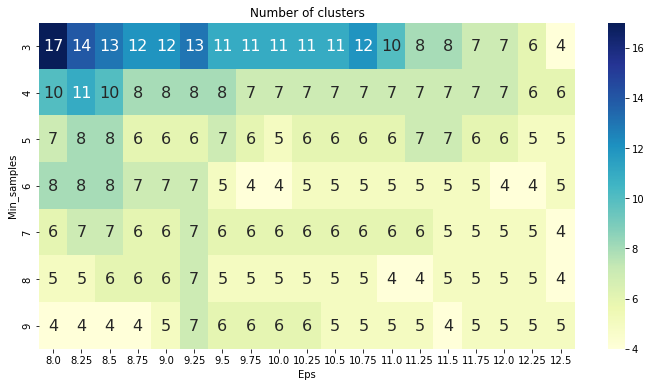

In [63]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

As the heatplot above shows, the number of clusters vary from 17 to 4.

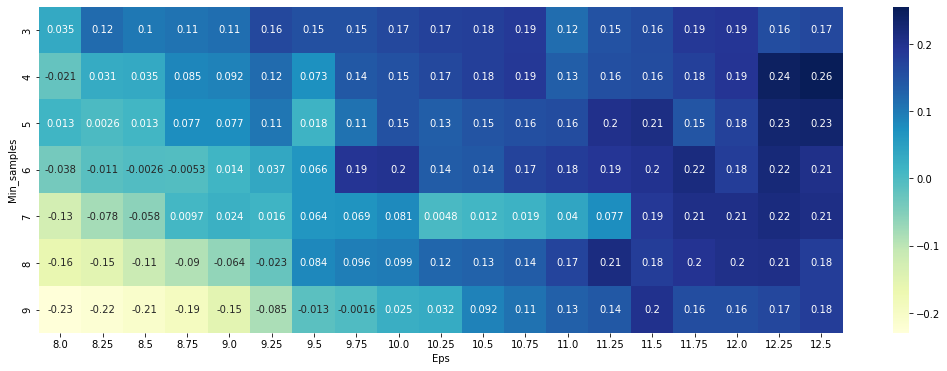

In [64]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [65]:
tmp

,Eps,Min_samples,Sil_score
0,8.0,3,0.035232
1,8.0,4,-0.021474
2,8.0,5,0.013117
3,8.0,6,-0.037857
4,8.0,7,-0.126911
...,...,...,...
128,12.5,5,0.234133
129,12.5,6,0.205740
130,12.5,7,0.208254
131,12.5,8,0.181647


In [66]:
pivot_1

Eps,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75,10.00,10.25,10.50,10.75,11.00,11.25,11.50,11.75,12.00,12.25,12.50
Min_samples,,,,,,,,,,,,,,,,,,,
3,0.035232,0.117940,0.102183,0.107942,0.113954,0.164834,0.154993,0.154993,0.165602,0.174253,0.178215,0.185858,0.117177,0.150258,0.161029,0.188331,0.191888,0.157426,0.165714
4,-0.021474,0.030919,0.035255,0.085121,0.092006,0.118466,0.072549,0.142616,0.151892,0.166105,0.178573,0.188536,0.132853,0.155379,0.159143,0.176464,0.193858,0.244624,0.255563
5,0.013117,0.002612,0.012783,0.076876,0.076876,0.105541,0.018201,0.110545,0.152126,0.133631,0.147800,0.155722,0.159694,0.204231,0.211564,0.145784,0.175918,0.231707,0.234133
6,-0.037857,-0.010658,-0.002641,-0.005314,0.013737,0.037279,0.065673,0.193420,0.197075,0.136633,0.141939,0.173588,0.182398,0.191160,0.199873,0.216902,0.180637,0.222944,0.205740
7,-0.126911,-0.078433,-0.057649,0.009674,0.023655,0.015950,0.064443,0.068555,0.081284,0.004844,0.011775,0.019368,0.040285,0.077408,0.187683,0.206755,0.206755,0.216902,0.208254
8,-0.163201,-0.150768,-0.114424,-0.089837,-0.063610,-0.023240,0.083996,0.095598,0.098985,0.123374,0.128795,0.136934,0.170953,0.214677,0.181296,0.195814,0.204914,0.206755,0.181647
9,-0.229525,-0.219381,-0.208293,-0.190845,-0.153043,-0.084620,-0.013031,-0.001585,0.024686,0.031568,0.091893,0.110003,0.131497,0.142801,0.200950,0.158244,0.158629,0.168117,0.180083


Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [67]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

Clusters sizes

In [68]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN created 5 clusters plus outliers cluster(-1). Sizes of clusters 0-4 vary significantly-some have only 4 or 8 observations. There are 18 outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



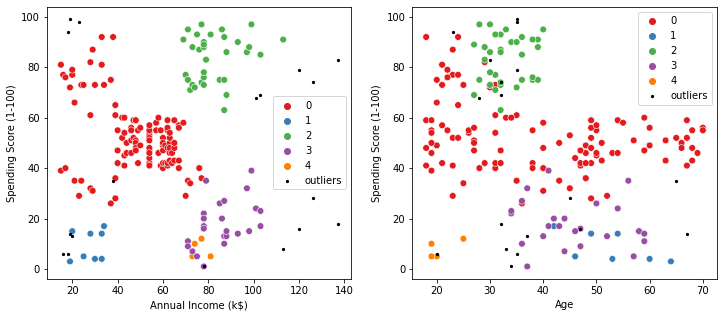

In [69]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster.

###4.3 Affinity Propagation

This chapter describes how Affinity Propagation works and shows its implementation to the mall customers segmentation.

####4.3.1 Description

It is built around the concept of sending messages between a pair of points until it converges. These messages are a way of measuring how similar these two points are to each other and can they be exemplars of each other. The algorithm finds an optimum number of clusters itself. This also implies very high time complexity cost of the order O(n²T) where n is the number of samples and T is the number of iterations until convergence. However, a big advantage of AP is the lack of sensitivity to the initialisation criteria. A very good explanation how this algorithm works is in this article on TowardDataScience.com.

The user is required to specify two parameters:  


*   Preference which is a negative number and controls how many exemplars are used
*   Damping factor which prevents numerical oscillations when updating messages



####4.3.2 Use case - customers segmentation

In [70]:
from sklearn.cluster import AffinityPropagation

In [72]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.



ValueError: ignored